# Importing necessary libraries

In [1]:
#| label: imports

# Install the package if you haven't already
# install.packages("mvtnorm")

# load library to sample from multivariate normal distribution
library(mvtnorm)

# Defining the functions

## Euclidean length (L2 norm) of the sampled set

In [2]:
#| label: euclidean_length

# compute average euclidean length of a matrix x (rows = samples)
average_euclidean_length <- function(x){
  mean(apply(x,1,norm,type="2"))
}

# compute variance of euclidean lengths of a matrix x (rows = samples)
variance_euclidean_length <- function(x){
  var(apply(x,1,norm,type="2"))
}

## Euclidean distance (L2 norm) between the sampled sets

In [3]:
#| label: euclidean_distance

# compute average euclidean distances between matrices x and x2 (rows = samples)
average_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  mean(apply(z,1,norm,type="2"))
}

# compute variance of euclidean distances between matrices x and x2 
variance_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  var(apply(z,1,norm,type="2"))
}

## Inner product between the sampled sets

In [4]:
#| label: inner_product

# compute average inner products between matrices x and x2 (rows = samples)
average_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  mean(z)
}

# compute varaince of inner products between matrices x and x2 (rows = samples)
variance_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  var(z)
}

# Looping over various dimensionality options

In [ ]:
#| label: loop_over_p

set.seed(5) # setting seed for reproducibility

p_range         <- 2^seq(0,10) # 1, 2, ..., 1024
n = 100

avg_eucl_length <- c()
var_eucl_length <- c()
avg_eucl_dist   <- c()
var_eucl_dist   <- c()
avg_inner_prod  <- c()
var_inner_prod  <- c()


for (p in p_range){
  x               <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  x2              <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  
  avg_eucl_length <- c(avg_eucl_length,average_euclidean_length(x))
  var_eucl_length <- c(var_eucl_length,variance_euclidean_length(x))
  avg_eucl_dist   <- c(avg_eucl_dist,average_euclidean_distances(x,x2))
  var_eucl_dist   <- c(var_eucl_dist,variance_euclidean_distances(x,x2))
  avg_inner_prod  <- c(avg_inner_prod,average_inner_product(x,x2))
  var_inner_prod  <- c(var_inner_prod,variance_inner_product(x,x2))  
}


ERROR: Error in parse(text = input): <text>:3:13: unexpected numeric constant
2: 
3: set.seed(5) 3
               ^


# Visual inspection

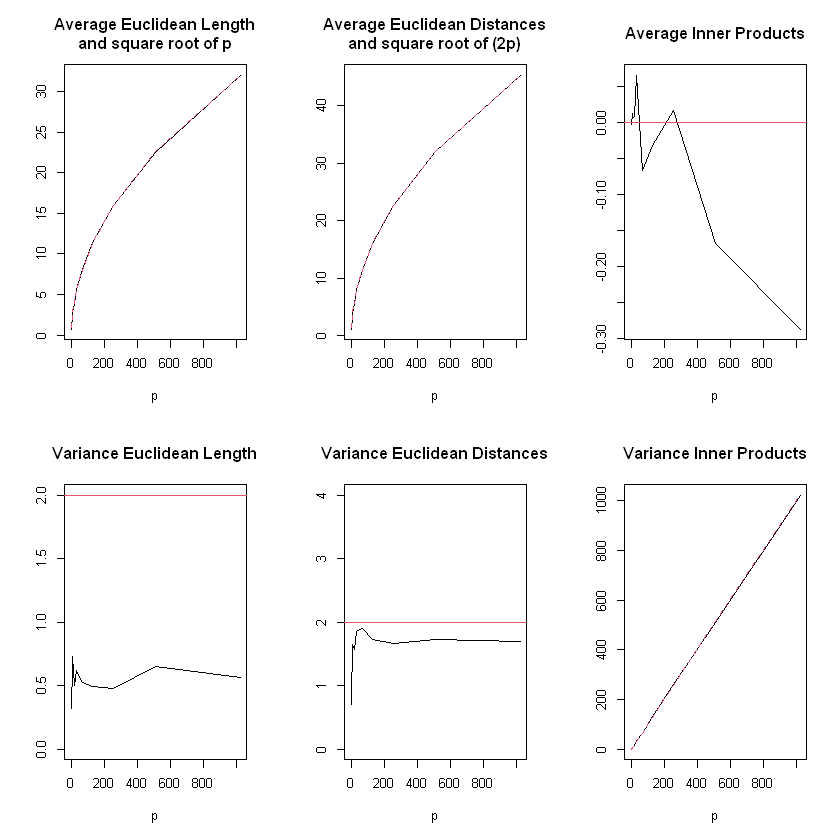

In [ ]:
#| label: plots

# compare the results visually
par(mfrow=c(2,3))

plot(p_range,avg_eucl_length,type="l",main="Average Euclidean Length\nand square root of p",xlab="p",ylab="")
lines(p_range,sqrt(p_range),col=2,lty=2)

plot(p_range,avg_eucl_dist,type="l",main="Average Euclidean Distances\nand square root of (2p)",xlab="p",ylab="")
lines(p_range,sqrt(2*p_range),col=2,lty=2)

plot(p_range,avg_inner_prod,type="l",main="Average Inner Products",xlab="p",ylab="")
abline(h=0,col=2)

plot(p_range,var_eucl_length,type="l",main="Variance Euclidean Length",xlab="p",ylab="",ylim=c(0,2))
abline(h=2,col=2)

plot(p_range,var_eucl_dist,type="l",main="Variance Euclidean Distances",xlab="p",ylab="",ylim=c(0,4))
abline(h=2,col=2)

plot(p_range,var_inner_prod,type="l",main="Variance Inner Products and p",xlab="p",ylab="")
lines(p_range,p_range,col=2,lty=2)


# Interpretation of plots

The plots confirm our results from the previous subpoints.
1. Average Euclidean Length - matches almost perfectly with $\sqrt{p}$, showing that as dimensionality increases, the average length of a Gaussian vector grows on the order of $\sqrt{p}$. 
2. Variance Euclidean Length - unlike the average, the variance does not grow with dimensionality, and never exceeds 2, indicating that the distribution of lengths remains stable regardless of dimensionality.
3. Average Euclidean distance - aligns almost exactly with $\sqrt{2p}$, showing that as dimensionality increases, two independent Gaussian vectors move apart on the order of $\sqrt{2p}$.
4. Variance Euclidean distance - as we saw for the variance of the lengths, the variance of the distances does not grow with dimensionality as well and never exceeds 2.
5. Average inner product - the average inner product is close to 0, some fluctuations still appear due to randomness, but the range of values on the y-axis is quite small.
6. Variance inner product - unlike the other variances, the variance of the inner product grows with dimensionality (in a perfect linear way)

# Full code

In [ ]:
#| label: full_code

# load library to sample from multivariate normal distribution
library(mvtnorm)

# compute average euclidean length of a matrix x (rows = samples)
average_euclidean_length <- function(x){
  mean(apply(x,1,norm,type="2"))
}

# compute variance of euclidean lengths of a matrix x (rows = samples)
variance_euclidean_length <- function(x){
  var(apply(x,1,norm,type="2"))
}

# compute average euclidean distances between matrices x and x2 (rows = samples)
average_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  mean(apply(z,1,norm,type="2"))
}

# compute variance of euclidean distances between matrices x and x2 
variance_euclidean_distances <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x[i,]-x2)
  }
  var(apply(z,1,norm,type="2"))
}

# compute average inner products between matrices x and x2 (rows = samples)
average_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  mean(z)
}

# compute varaince of inner products between matrices x and x2 (rows = samples)
variance_inner_product <- function(x,x2){
  z = c()
  for (i in 1:nrow(x)){
    z = rbind(z,x2%*%x[i,])
  }
  var(z)
}

set.seed(5)

p_range         <- 2^seq(0,10) # 1, 2, ..., 1024
n = 100

avg_eucl_length <- c()
var_eucl_length <- c()
avg_eucl_dist   <- c()
var_eucl_dist   <- c()
avg_inner_prod  <- c()
var_inner_prod  <- c()


for (p in p_range){
  x               <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  x2              <- rmvnorm(n=n, mean=rep(0,p), sigma=diag(p))
  
  avg_eucl_length <- c(avg_eucl_length,average_euclidean_length(x))
  var_eucl_length <- c(var_eucl_length,variance_euclidean_length(x))
  avg_eucl_dist   <- c(avg_eucl_dist,average_euclidean_distances(x,x2))
  var_eucl_dist   <- c(var_eucl_dist,variance_euclidean_distances(x,x2))
  avg_inner_prod  <- c(avg_inner_prod,average_inner_product(x,x2))
  var_inner_prod  <- c(var_inner_prod,variance_inner_product(x,x2))  
}

# compare the results visually
par(mfrow=c(2,3))

plot(p_range,avg_eucl_length,type="l",main="Average Euclidean Length\nand square root of p",xlab="p",ylab="")
lines(p_range,sqrt(p_range),col=2,lty=2)

plot(p_range,avg_eucl_dist,type="l",main="Average Euclidean Distances\nand square root of (2p)",xlab="p",ylab="")
lines(p_range,sqrt(2*p_range),col=2,lty=2)

plot(p_range,avg_inner_prod,type="l",main="Average Inner Products",xlab="p",ylab="")
abline(h=0,col=2)

plot(p_range,var_eucl_length,type="l",main="Variance Euclidean Length",xlab="p",ylab="",ylim=c(0,2))
abline(h=2,col=2)

plot(p_range,var_eucl_dist,type="l",main="Variance Euclidean Distances",xlab="p",ylab="",ylim=c(0,4))
abline(h=2,col=2)

plot(p_range,var_inner_prod,type="l",main="Variance Inner Products and p",xlab="p",ylab="")
lines(p_range,p_range,col=2,lty=2)
